<a href="https://colab.research.google.com/github/kindachamma1/ComputerVision2025/blob/Exercise2/Exercise2_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 2: IMAGE SEGMENTATION**

Kinda Chamma

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


**Task 1**: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.


---





<ipython-input-4-63cf48a6d897>:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
<ipython-input-4-63cf48a6d897>:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


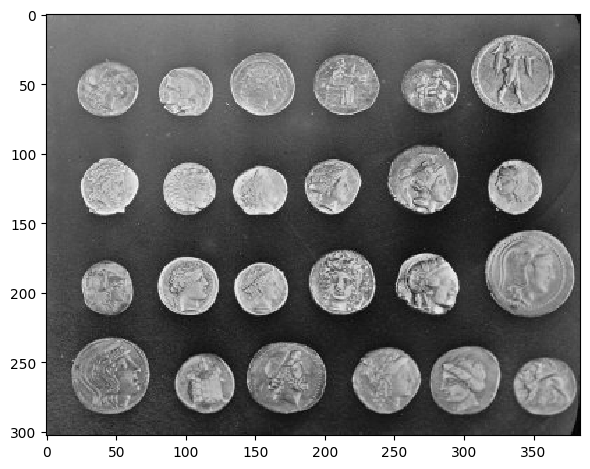

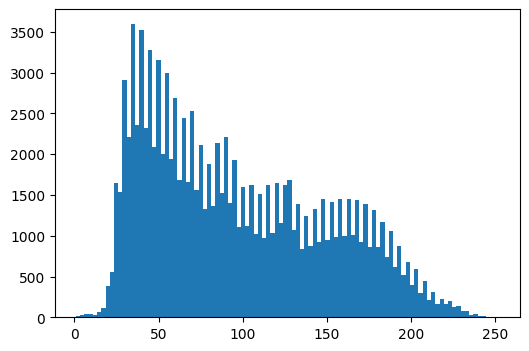

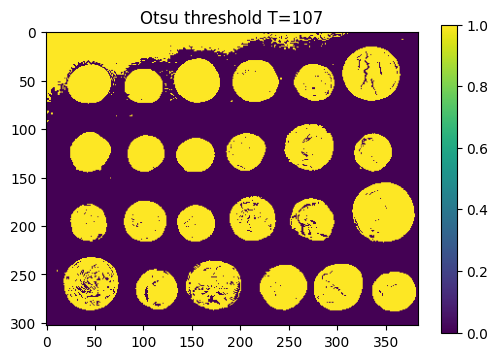

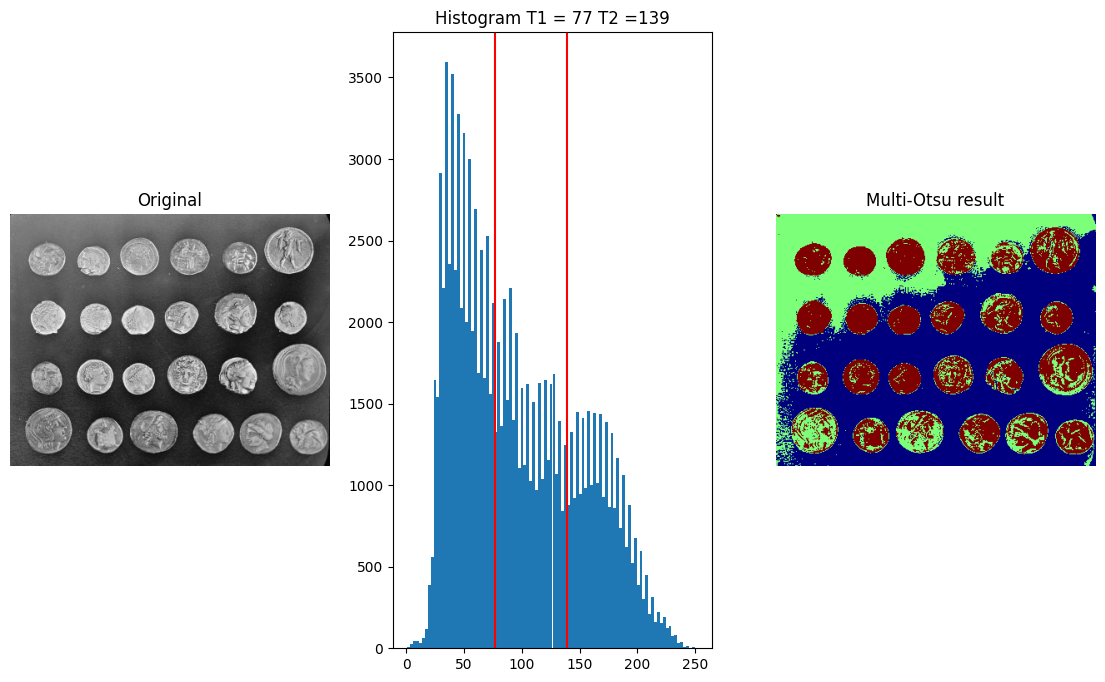

In [4]:
# 1. Load the image
import skimage as sk
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np


I = sk.data.coins()

sk.io.imshow(I)
sk.io.show()

I.shape

# 2. Visualize the histogram
flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()

# 3. Apply Otsu Optimal Threshold
thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

# 4. Apply Otsu multiple thresholds


# Applying multi-Otsu threshold for the default value, generating
# three classes by default
thresholds = threshold_multiotsu(I)

# Using the threshold values, we generate the three regions.
regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting the original image.
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(flat_data, bins=100,range=[1,flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()


**Observation**: The choise of the image is arbitrary. For the threshold, since the histogram doesn't have a clear separation, I decided to apply the optimal ostu. After applying it, I noticed that in the upper left there is a region considered as yellow, even if it's not the case. I decided them to apply the multi otsu but the result was worse, showing that sometimes the choice of a low complexity method is better. I believe that we can apply some sort of a filter on the optimal otsu thresholding, and then apply it again to get a better result.



---


**Task 2**: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.



---



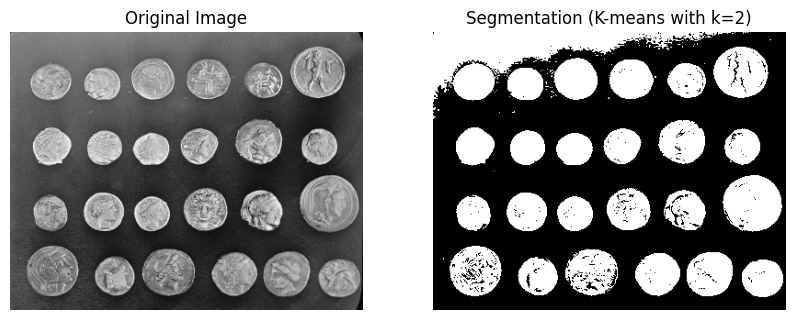

In [5]:
# 1. Load image : will use the same as previously
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# 2. K-means
# Reshape the image into (N_PIXELS, N_FEATURES) for clustering
v_I = np.reshape(I, (-1, 1))  # shape: (303*384, 1)

# Fit KMeans with 2 clusters
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

# Predict cluster assignments for each pixel
v_kmeans = kmeans.predict(v_I)

# Reshape clustered labels back to original image shape
I_kmeans = np.reshape(v_kmeans, I.shape)

# 3. Visualization
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.axis('off')

plt.show()

**Observation**: I tried to apply with k=1 -> k=4 (not more, because this means that the image still needs preprocessing, which isn't the case here). The best segmentation was the one made with k=2. The only issue, present as before, is the white space in the upper left. A filter should be able to mitigate this issue.



---


**Task 3**: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.



---



For this, I will use the image of human red blood cells with the ground truth corresponding.

Images where found on this link : https://bbbc.broadinstitute.org/BBBC009

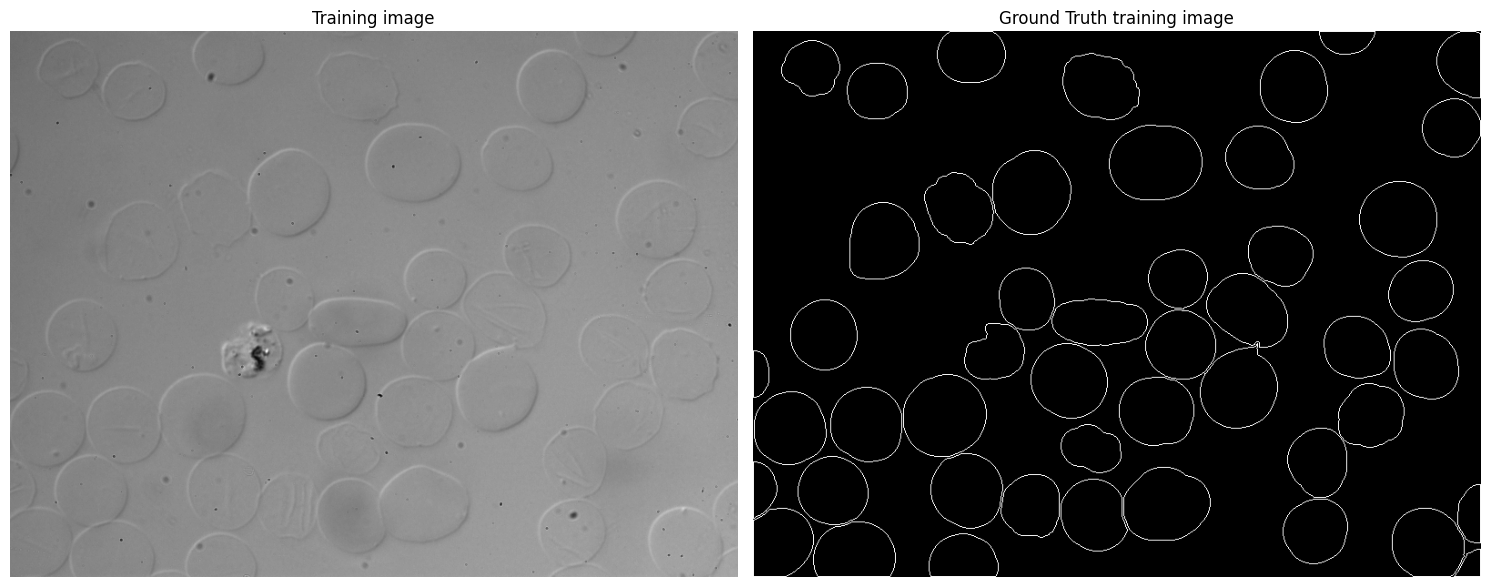

In [7]:
# 1. Visualize the images
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec

# Path of the folder in your google drive unit where you have the images:

path = '/content/sample_data/'

I_train = sk.io.imread(os.path.join(path,'6hr-002-DIC.tif'))
I_train_GT = sk.io.imread(os.path.join(path,'6hr-002-DIC-GT.tif'))

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I_train, cmap=plt.cm.gray)
ax0.set_title('Training image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_train_GT, cmap=plt.cm.gray)
ax1.set_title('Ground Truth training image')
ax1.set_axis_off()

plt.tight_layout()
plt.show()